In [505]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [506]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd
import os
import ShadePlots_Faces as SF
import loadmat
import numpy as np
import fdr_correct
from __future__ import division
from scipy import stats
import glob
import cPickle as pickle

In [508]:
SF = reload(SF) 

## Shade Plot images (stim and resp locked) for Face Emo vs Gen

In [5]:
SJdir = '/home/knight/matar/MATLAB/DATA/Avgusta/'
filename = '/home/knight/matar/MATLAB/DATA/Avgusta/Anat/FacePerception_Paper_Graph_info.xlsx'
df = pd.ExcelFile(filename).parse('Emo Vs Gen')

In [373]:
subjs = df.columns[1:]
for s in subjs:
    elec_list = df[s]
    elec_list = elec_list[~(np.isnan(elec_list))].astype(int)
    df_subj = SF.shadeplots_faces(s, elec_list)
    #df_subj = SF.shadeplots_faces_resp(s, elec_list)

In [374]:
subjs = df.columns[1:]
for s in subjs:
    SF.plot_shadeplot(s)
    #SF.plot_shadeplot_resp(s)

/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e2.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e4.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e5.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e6.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e13.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e15.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e16.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e25.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e28.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e30.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/ShadePlots_Faces/data/JH2_Emo_vs_Gen_e48.p
/home/knight/matar/MATLAB/DATA/Avgusta/Anat/Sha

## Peak latencies and amplitudes

In [490]:
SF = reload(SF)

In [6]:
subjs = df.columns[1:]

for s in subjs:
    for task in ['FaceEmo', 'FaceGen']:
        elec_list = df[s]
        elec_list = elec_list[~(np.isnan(elec_list))].astype(int)
        data_dict = SF.shadeplots_faces_stats(s, task, elec_list)

        lats = pd.DataFrame(data_dict['lats'])
        peaks = pd.DataFrame(data_dict['peaks'])
        lats_resp = pd.DataFrame(data_dict['lats_resp'])
        peaks_resp = pd.DataFrame(data_dict['peaks_resp'])
        peaks_maxRT = pd.DataFrame(data_dict['peaks_maxRT'])
        lats_maxRT = pd.DataFrame(data_dict['lats_maxRT'])
        peaks_mean = pd.Series(data_dict['peaks_mean'])
        lats_mean = pd.Series(data_dict['lats_mean'])
        peaks_mean_resp = pd.Series(data_dict['peaks_mean_resp'])
        lats_mean_resp = pd.Series(data_dict['lats_mean_resp'])
        
        lats.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'lats'])+'.csv'))
        peaks.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'peaks'])+'.csv'))
        lats_resp.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'lats_resp'])+'.csv'))
        peaks_resp.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'peaks_resp'])+'.csv'))
        lats_maxRT.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'lats_maxRT'])+'.csv'))
        peaks_maxRT.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'peaks_maxRT'])+'.csv'))
        lats_mean.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'lats_mean'])+'.csv'))
        peaks_mean.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'peaks_mean'])+'.csv'))
        lats_mean_resp.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'lats_mean_resp'])+'.csv'))
        peaks_mean_resp.to_csv(os.path.join(SJdir,'Anat', 'ShadePlots_Faces', 'SingleTrials', 'csvs', 'RT_300ms_pertrial', '_'.join([s, task, 'peaks_mean_resp'])+'.csv'))


In [504]:
peaks_mean

16    28.361874
30    16.632994
31    82.920873
32    50.761279
36    27.688483
37    31.715436
38    32.586523
42    29.917342
45    47.795287
46    57.481566
48    57.081457
53    39.158346
54    52.056970
55    73.743318
56    67.984611
59    16.562870
60    14.887245
61    66.823790
62    36.621710
63    23.442568
dtype: float64

## Single trial images (from csv)

In [509]:
i = 0
filename = os.path.join('/home/knight/matar/MATLAB/DATA/Avgusta/Anat/', 'FacePaper_single_graphs', 'graph'+ str(i+1) + '_*.csv')

filename
glob.glob(filename)

['/home/knight/matar/MATLAB/DATA/Avgusta/Anat/FacePaper_single_graphs/graph1_full.csv']

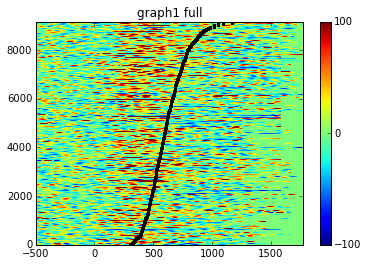

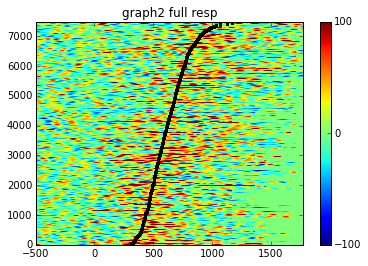

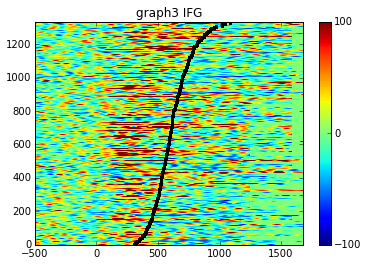

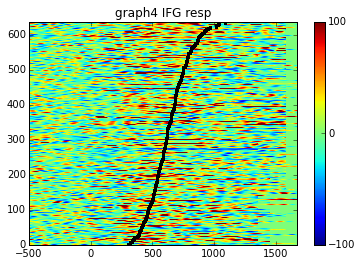

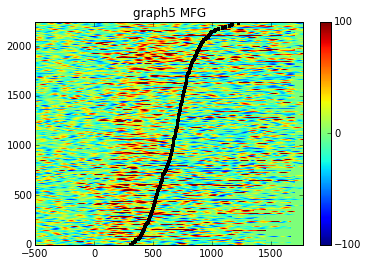

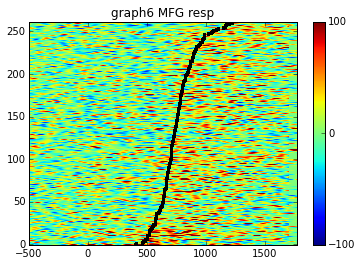

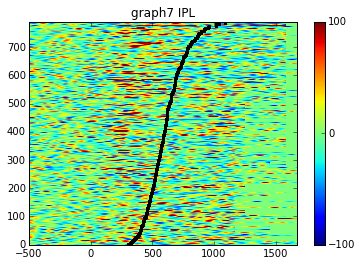

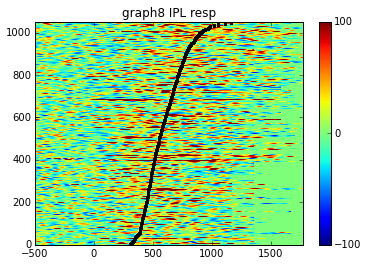

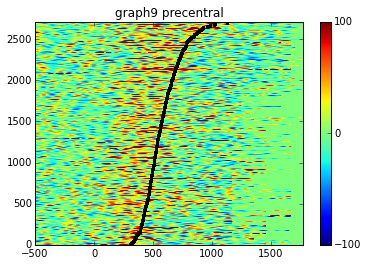

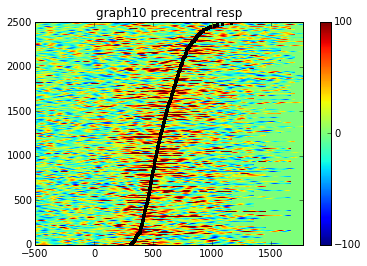

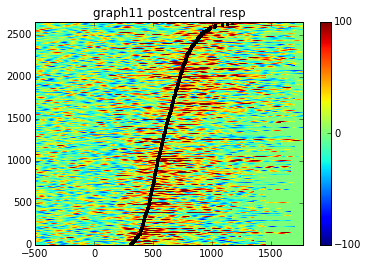

In [510]:
for i in range(11): #each master csv
    filename = os.path.join('/home/knight/matar/MATLAB/DATA/Avgusta/Anat/', 'FacePaper_single_graphs', 'graph'+ str(i+1) + '_*.csv')
    filename = glob.glob(filename)[0]
    
    df = pd.read_csv(filename).dropna()
    
    #gather trials from each subj/task for a single image
    alldata = pd.DataFrame()
    for j in df.groupby(['subject','task']):
        subj = j[0][0]
        task = j[0][1].replace('_', '').replace(' ', '')
        elecs = j[1].electrode

        datafile =  os.path.join('/home/knight/matar/MATLAB/DATA/Avgusta/Subjs', subj, task, 'HG_elecMTX_percent_eleclist.mat')
        datadict = loadmat.loadmat(datafile)

        RTs = datadict['RTs']

        idx = np.in1d(datadict['elec_list'], elecs)

        data = datadict['data_percent']
        data = data[idx,:,:]
        data = np.vstack([item for item in data])

        allRTs = np.tile(RTs, sum(idx))

        alldata = alldata.append(pd.DataFrame(data, index = allRTs))
    
    #sort all trials and prepare RTs
    alldata = alldata.sort_index(inplace=False)
    alldata = alldata.fillna(0)
    allRTs = alldata.index.values
    allRTs = np.array([x for x in allRTs])
    alldata = np.array(alldata)

    #plot
    f,ax = plt.subplots()
    ax.autoscale(enable = True, tight = True)
    cax = ax.pcolormesh(np.arange(-500, alldata.shape[1]-500), np.arange(0, len(allRTs)), alldata, zorder = 0)
    cbar = f.colorbar(cax, ticks = [-100, 0 , 100], orientation = 'vertical')
    cax.set_clim(vmin=-100,vmax=100)

    for j in np.arange(len(allRTs)):
        ax.plot((allRTs[j], allRTs[j]), (j-0.5, j+0.5), 'k', linewidth = 3,zorder = 1)
    
    title = filename.split('/')[-1][:-4].replace('_', ' ')
    ax.set_title(title)
    
    filename= filename[:-4]+'.png'
    
    plt.savefig(filename)